In [1]:
import os
import cv2
import numpy as np
from sklearn import svm
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# 数据暂存
features = []
labels = []

In [3]:
# 用于决定采集的数据标签
is_positive = False

In [4]:
# 鼠标回调函数
def on_mouse(event, x, y, flags, param):
    global features, labels, is_positive

    if event == cv2.EVENT_LBUTTONDOWN:
        color = img[y, x] # 虽然是img[y, x], 但是返回的是BGR三个通道的数值

        # 根据标签决定是正样本还是负样本，标签在主函数中根据键入来更改
        if is_positive:
            labels.append(1)
        else:
            labels.append(0)

        features.append(color)
        print(f'Collected color: {color} at position: {(x, y)} with label: {labels[-1]}')

In [5]:
# 开启新窗口
cv2.namedWindow('image')
cv2.setMouseCallback("image", on_mouse)
# 加载图片
img_path = './input_data/0618.png'
img = cv2.imread(img_path)
image_name = os.path.splitext(os.path.basename(img_path))[0]

while True:
    cv2.imshow('image', img)

    key = cv2.waitKey(1) & 0xFF

    if key == ord('y'):
        print(f"Collecting positive samples. Press 'n' to switch, 'Esc' to stop.")
        is_positive = True
    elif key == ord('n'):
        print(f"Collecting positive samples. Press 'y' to switch, 'Esc' to stop.")
        is_positive = False
    elif key == 27:
        print("Stopping data collection.")
        break
# 关闭窗口
cv2.destroyAllWindows()

Collected color: [253 247 239] at position: (405, 44) with label: 1
Collected color: [240 231 219] at position: (395, 44) with label: 1
Collected color: [229 219 208] at position: (372, 46) with label: 1
Collected color: [255 247 237] at position: (338, 51) with label: 1
Collected color: [224 217 206] at position: (360, 51) with label: 1
Collected color: [235 220 217] at position: (362, 48) with label: 1
Collected color: [235 226 211] at position: (346, 52) with label: 1
Collected color: [230 218 210] at position: (326, 56) with label: 1
Collected color: [248 246 249] at position: (297, 62) with label: 1
Collected color: [253 252 251] at position: (295, 63) with label: 1
Collected color: [212 212 221] at position: (280, 70) with label: 1
Collected color: [250 249 249] at position: (262, 77) with label: 1
Collected color: [247 248 247] at position: (251, 79) with label: 1
Collected color: [253 250 251] at position: (241, 83) with label: 1
Collected color: [255 253 255] at position: (258

In [6]:
# 转为numpy数组处理
features = np.array(features)
labels = np.array(labels)

绘制R-G图

In [7]:
# 绘制R-G图
def Plot_BGR(features):
    # 分离正负样本
    positive_features = features[labels == 1]
    negative_features = features[labels == 0]
    
    # opencv 默认提取通道是BGR -> B(0), G(1) R(2)
    positive_R = positive_features[:, 2]
    positive_G = positive_features[:, 1]
    
    negative_R = negative_features[:, 2]
    negative_G = negative_features[:, 1]
    
    plt.scatter(positive_R, positive_G, color='red', label='Positive Samples')
    plt.scatter(negative_R, negative_G, color='blue', label='Negative Samples')
    
    plt.title('R-G channel Plot')
    plt.xlabel('R Channel')
    plt.ylabel('G Channel')
    plt.legend()
    
    plt.show()

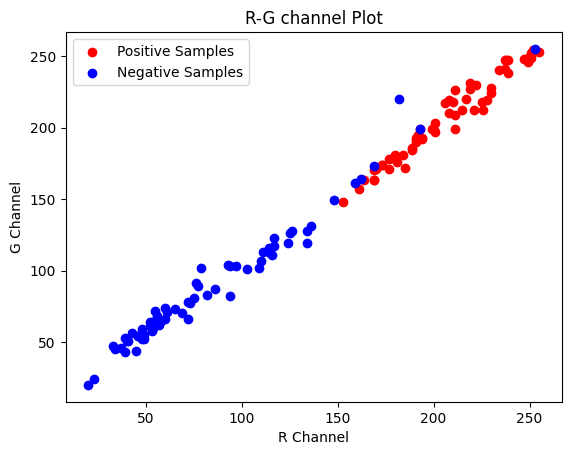

In [8]:
# 未标准化训练集R-G图像
Plot_BGR(features)

# 标准化
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [9]:
import pickle

# 假设你已经采集了数据并存储在变量 features 和 labels 中
features = [...]  # 采集的特征数据
labels = [...]    # 采集的标签数据

# 指定要保存的文件名
file_path = f'./RGB_data/{image_name}_data.pkl'

# 使用 'wb' 模式打开文件，因为 pickle 模块处理的是二进制数据
with open(file_path, 'wb') as file:
    # 使用 pickle 模块的 dump 方法来保存数据
    pickle.dump({'features': features, 'labels': labels}, file)

print(f'Data has been saved to {file_path}')

Data has been saved to ./RGB_data/0618_data.pkl
